In [1]:
import rebound

In [2]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, a=1., e=0.1)
sim.add(a=1.4, e=0.1)

In [3]:
sim.integrate(100.)

In [4]:
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.calculate_orbits():
    print(o)

0.0001379031111733169 0.11100285684422287 0.0
0.7620968888266642 -0.3934338982350228 0.0
-1.5948501191422428 0.20487096187200812 0.0
<rebound.Orbit instance, a=0.9999999999999998 e=0.10000000000000006 inc=0.0 Omega=0.0 omega=0.0 f=5.698402270529936>
<rebound.Orbit instance, a=1.4174273398342736 e=0.12988282793113465 inc=0.0 Omega=0.0 omega=0.09938842199489617 f=2.9831333920230048>


## Unit
## G=1

In [1]:
import rebound

In [4]:
sim = rebound.Simulation()
sim.add(m=0.5)
sim.add(m=0.5, a=1.)

In [5]:
print(sim.particles[1].P)

6.283185307179586


In [2]:
sim = rebound.Simulation()
sim.add(m=1., hash="star")
sim.add(a=1., hash="planet")
p = sim.particles['planet']

In [3]:
p

<rebound.particle.Particle object at 0x7f3acc46c050, m=0.0 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>

In [4]:
p.x

1.0

In [2]:
sim = rebound.Simulation()
sim.add(m=1) # star
sim.add(a=1, e=0.1) # planet
o = sim.particles[1].calculate_orbit(primary=sim.particles[0])
print(o.a, o.e)

1.0000000000000002 0.10000000000000023


In [26]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(a=1, e=0.1)
sim.add(m=1, a=2, e=0.1)
orbits = sim.calculate_orbits()
for o in orbits:
    print(o.a, o.e, o.rhill)

1.0000000000000002 0.10000000000000023 0.0
2.0000000000000004 0.10000000000000023 1.3867225487012695


## Catching close encounters

In [8]:
import rebound
import numpy as np

In [11]:
def setupSimulation():
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1e-3, a=1., hash="planet1")
    sim.add(m=5e-3, a=1.25, hash="planet2")
    sim.move_to_com()
    return sim

In [12]:
sim = setupSimulation()
sim.integrate(100.*2.*np.pi)

In [20]:
p1 = sim.particles['planet2']

In [21]:
o = p1.calculate_orbit()
print(o.a, o.P, o.rhill)

1.041932973328092 6.662551071192539 0.1234936630448223


In [17]:
p1.P

66.8083960688059

In [18]:
for o in sim.calculate_orbits():
    print(o)

<rebound.Orbit instance, a=4.837030329030001 e=0.7208042847009366 inc=0.0 Omega=0.0 omega=2.733906576934375 f=4.136442889245854>
<rebound.Orbit instance, a=1.041932973328092 e=0.12308142899763105 inc=0.0 Omega=0.0 omega=5.929056516502594 f=4.858705541543642>


In [27]:
sim = setupSimulation() # Resets everything
sim.exit_min_distance = 0.15
Noutputs = 1000
times = np.linspace(0,100.*2.*np.pi,Noutputs)
distances = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
try:
    for i,time in enumerate(times):
        sim.integrate(time)
        dp = ps[1] - ps[2]   # Calculates the coponentwise difference between particles 
        distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
except rebound.Encounter as error:
    print(error)

Two particles had a close encounter (d<exit_min_distance).


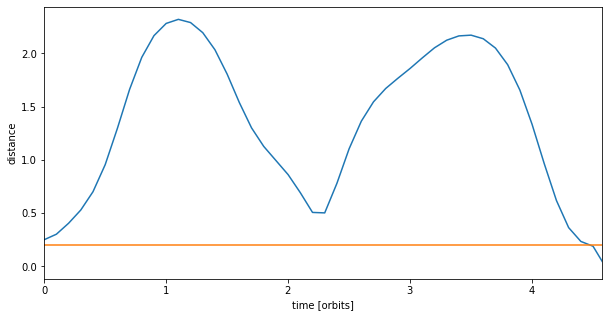

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("time [orbits]")
ax.set_xlim([0,sim.t/(2.*np.pi)])
ax.set_ylabel("distance")
plt.plot(times/(2.*np.pi), distances);
plt.plot([0.0,12],[0.2,0.2]); # Plot our close encounter criteria;